In [166]:
import pandas as pd
from mpl_finance import candlestick_ochl
from mpl_finance import candlestick_ohlc
from matplotlib.pylab import date2num

In [156]:
stock_day=pd.read_csv("stock_day.csv")
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [158]:
stock_day.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [168]:
# 把index转换为时间类型
pd.to_datetime(stock_day.index)

DatetimeIndex(['2015-03-02', '2015-03-03', '2015-03-04', '2015-03-05',
               '2015-03-06', '2015-03-09', '2015-03-10', '2015-03-11',
               '2015-03-12', '2015-03-13',
               ...
               '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12',
               '2018-02-13', '2018-02-14', '2018-02-22', '2018-02-23',
               '2018-02-26', '2018-02-27'],
              dtype='datetime64[ns]', length=643, freq=None)

In [157]:
help(candlestick_ochl) # x 坐标系, quotes 数据, width=0.2, colorup='k' 阳线, colordown='r' 阴线

Help on function candlestick_ochl in module mpl_finance:

candlestick_ochl(ax, quotes, width=0.2, colorup='k', colordown='r', alpha=1.0)
    Plot the time, open, close, high, low as a vertical line ranging
    from low to high.  Use a rectangular bar to represent the
    open-close span.  If close >= open, use colorup to color the bar,
    otherwise use colordown
    
    Parameters
    ----------
    ax : `Axes`
        an Axes instance to plot to
    quotes : sequence of (time, open, close, high, low, ...) sequences
        As long as the first 5 elements are these values,
        the record can be as long as you want (e.g., it may store volume).
    
        time must be in float days format - see date2num
    
    width : float
        fraction of a day for the rectangle width
    colorup : color
        the color of the rectangle where close >= open
    colordown : color
         the color of the rectangle where close <  open
    alpha : float
        the rectangle alpha level
   

In [160]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [171]:
# 股票数据 按照时间排序
stock_day=stock_day.sort_index()
# 获取float类型的时间
# 把index转换为时间类型
stock_day.index=pd.to_datetime(stock_day.index)

day_k=stock_day[['open','close','high','low']] # 股票的4个数据
day_k['time']=date2num(stock_day.index)
# 设置日k数据的顺序
day_k=day_k[['time','open','close','high','low']]
day_k.head()

/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,time,open,close,high,low
2015-03-02,735659.0,12.25,12.52,12.67,12.20
2015-03-03,735660.0,12.52,12.70,13.06,12.52
2015-03-04,735661.0,12.80,12.90,12.92,12.61
2015-03-05,735662.0,12.88,13.16,13.45,12.87
2015-03-06,735663.0,13.17,14.28,14.48,13.13


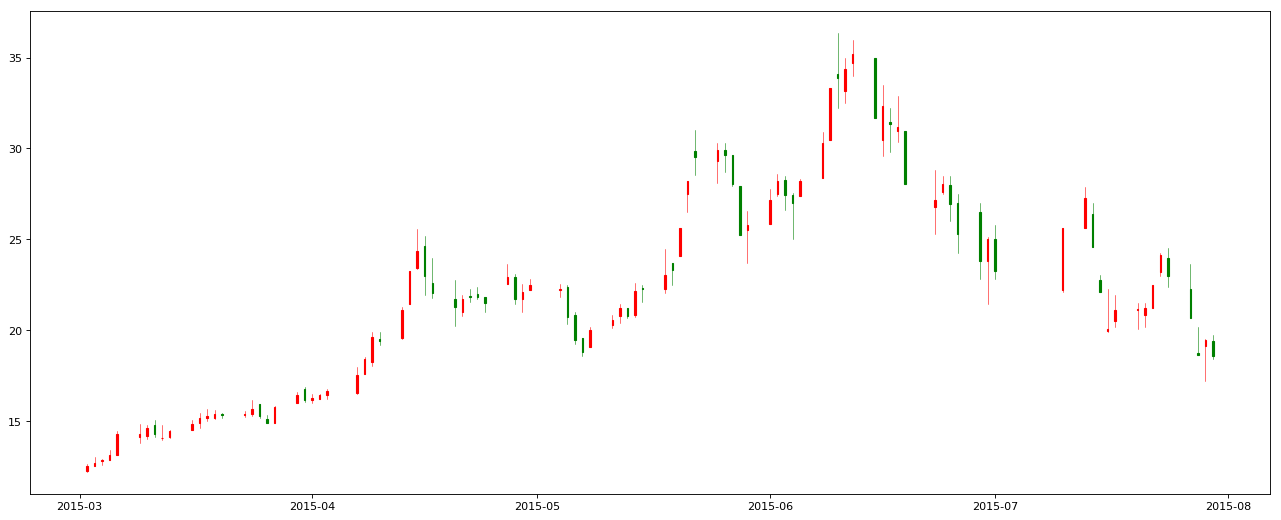

In [177]:
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,8),dpi=80) # 获取坐标系
candlestick_ochl(axes,day_k.values[:100],colorup='r',colordown='g')
# x轴以时间类型显示
axes.xaxis_date()
plt.show()

In [181]:

stock_day.head(15)

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,124820.96,120066.09,120066.09,4.96
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,127775.94,117664.81,117664.81,4.10
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,126135.54,114032.98,114032.98,2.91
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10


In [185]:
# 按周 重采样  相当于分组
week_day=stock_day.resample('W').last() # 一周内最后一天的数据，close 一周内最后一天的收盘价
# open 一周内第一天的开盘价
week_day['open']=stock_day['open'].resample('W').first()
# high 一周内 最高价
week_day['high']=stock_day['high'].resample('W').first()
# low 一周内 最低价
week_day['low']=stock_day['low'].resample('W').first()
week_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-08,12.25,12.67,14.28,12.20,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-15,14.14,14.85,14.47,13.80,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10
2015-03-22,14.52,15.05,15.34,14.51,76800.13,-0.04,-0.26,15.216,14.792,14.232,109044.42,105741.03,108857.41,2.63
2015-03-29,15.34,15.56,15.77,15.25,120352.13,0.84,5.63,15.412,15.314,14.527,109051.14,109047.78,108905.84,4.12
2015-04-05,15.99,16.63,16.66,15.99,91962.88,0.22,1.34,16.396,15.904,15.348,79293.34,94172.24,99956.63,3.15


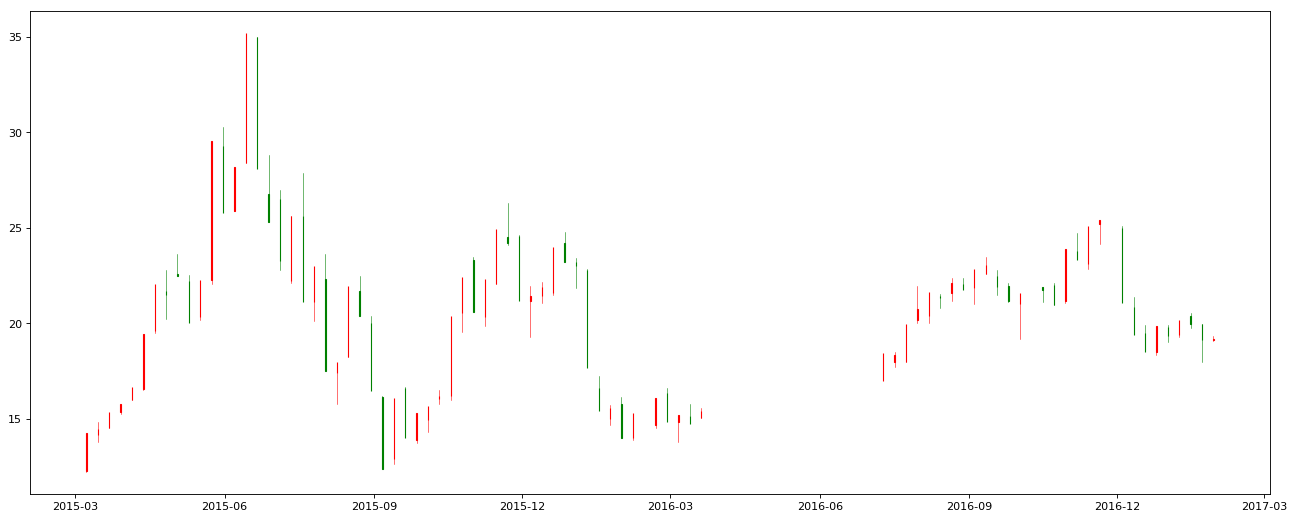

In [187]:
# 绘制周k
week_day['time']=date2num(week_day.index)
week_day=week_day[['time','open','close','high','low']]
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,8),dpi=80) # 获取坐标系
candlestick_ochl(axes,week_day.values[:100],colorup='r',colordown='g')
# x轴以时间类型显示
axes.xaxis_date()
plt.show()

In [188]:
# 时间类型
pd.to_datetime("2018-9-2")

Timestamp('2018-09-02 00:00:00')

In [190]:
pd.to_datetime("20180902")

Timestamp('2018-09-02 00:00:00')

In [191]:
pd.to_datetime("2018/09/02")

Timestamp('2018-09-02 00:00:00')

In [193]:
pd.to_datetime("13/02/2018")

Timestamp('2018-02-13 00:00:00')

In [194]:
from datetime import datetime

In [195]:
pd.to_datetime(datetime(2018,9,1))

Timestamp('2018-09-01 00:00:00')

In [196]:
pd.to_datetime(["2017-01-01", "2017-02-01", "2017-03-01"])

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01'], dtype='datetime64[ns]', freq=None)

In [209]:
pd.DatetimeIndex(["2017-01-01", "2017-02-01", "2017-03-01"])

DatetimeIndex(['2017-01-01', '2017-02-01', '2017-03-01'], dtype='datetime64[ns]', freq=None)

In [203]:
pd.date_range("2018-9-1","2018-9-10",freq="2D2H")

DatetimeIndex(['2018-09-01 00:00:00', '2018-09-03 02:00:00',
               '2018-09-05 04:00:00', '2018-09-07 06:00:00',
               '2018-09-09 08:00:00'],
              dtype='datetime64[ns]', freq='50H')

In [206]:
pd.date_range("2017-01-02", "2017-12-30", freq='BM')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30', '2017-12-29'],
              dtype='datetime64[ns]', freq='BM')

In [208]:
pd.date_range("2017-01-02", "2017-12-30", freq='WOM-4SUN')

DatetimeIndex(['2017-01-22', '2017-02-26', '2017-03-26', '2017-04-23',
               '2017-05-28', '2017-06-25', '2017-07-23', '2017-08-27',
               '2017-09-24', '2017-10-22', '2017-11-26', '2017-12-24'],
              dtype='datetime64[ns]', freq='WOM-4SUN')

In [212]:
stock_day.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16


In [220]:
stock_day.index.year

Index(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Monday',
       'Tuesday', 'Wednesday', 'Thursday', 'Friday',
       ...
       'Wednesday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday', 'Friday', 'Monday', 'Tuesday'],
      dtype='object', length=643)

In [223]:
stock_day.loc[stock_day.index.weekday_name == "Tuesday"]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-17,14.90,15.44,15.18,14.63,158770.77,0.31,2.08,14.586,14.223,13.954,103853.62,110551.48,111739.85,5.43
2015-03-24,15.38,16.16,15.68,15.28,153390.08,0.30,1.95,15.418,15.002,14.385,106966.89,105410.25,110336.03,5.25
2015-03-31,16.78,16.88,16.17,16.07,84467.62,-0.25,-1.52,15.718,15.568,14.896,94392.47,100679.68,105615.58,2.89
2015-04-07,16.54,17.98,17.54,16.50,122471.85,0.88,5.28,16.620,16.120,15.510,86769.62,97473.29,98832.94,4.19
2015-04-14,21.45,23.24,23.24,21.45,154693.44,2.11,9.99,20.368,18.494,16.982,156064.66,121417.14,114763.57,5.30
2015-04-21,21.00,21.97,21.71,20.80,111028.80,0.44,2.07,22.478,21.423,18.772,193934.80,174999.73,136236.51,3.80
2015-04-28,22.93,23.10,21.75,21.47,110698.53,-1.17,-5.11,21.960,22.219,20.357,121443.63,157689.21,139553.18,3.79
2015-05-05,22.41,22.48,20.72,20.33,88378.98,-1.53,-6.88,21.860,21.906,21.456,85181.97,103345.82,139744.93,3.03


In [219]:
stock_day.loc["2015-3"]

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2015-03-02,12.25,12.67,12.52,12.20,96291.73,0.32,2.62,12.520,12.520,12.520,96291.73,96291.73,96291.73,3.30
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16
2015-03-09,14.14,14.85,14.31,13.80,144945.66,0.03,0.21,13.470,13.312,13.312,124820.96,120066.09,120066.09,4.96
2015-03-10,14.20,14.80,14.65,14.01,101213.51,0.34,2.38,13.860,13.503,13.503,117249.34,117372.87,117372.87,3.46
2015-03-11,14.80,15.08,14.30,14.14,119708.43,-0.35,-2.39,14.140,13.603,13.603,127775.94,117664.81,117664.81,4.10
2015-03-12,14.11,14.80,14.11,13.95,84978.37,-0.19,-1.33,14.330,13.659,13.659,126135.54,114032.98,114032.98,2.91
2015-03-13,14.13,14.50,14.47,14.08,61342.22,0.36,2.55,14.368,13.740,13.740,102437.64,108763.91,108763.91,2.10


/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).mean()
  import sys
/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:13: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(span=5,min_periods=0,adjust=True,ignore_na=False).mean()
  del sys.path[0]


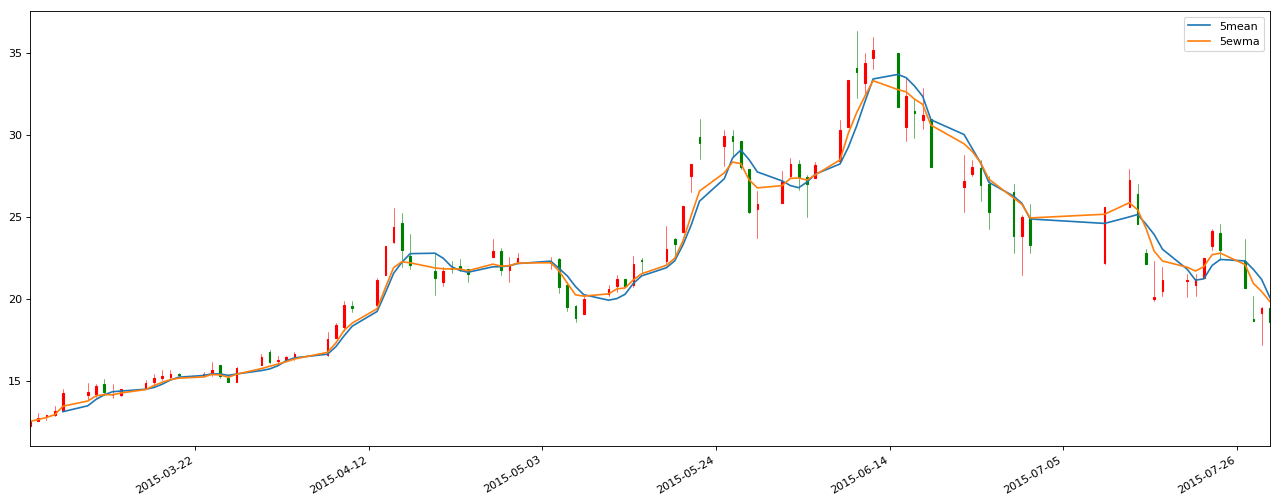

In [235]:

fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(20,8),dpi=80) # 获取坐标系
candlestick_ochl(axes,day_k.values[:100],colorup='r',colordown='g')

# 绘制平均线
# pd.rolling_mean(stock_day['close'][:100],window=1).plot()
pd.rolling_mean(stock_day['close'][:100],window=5).plot(label="5mean")
# pd.rolling_mean(stock_day['close'][:100],window=20).plot()
# pd.rolling_mean(stock_day['close'][:100],window=60).plot()

# 绘制指数加权均线
# pd.ewma(stock_day['close'][:100],span=1).plot()
pd.ewma(stock_day['close'][:100],span=5).plot(label="5ewma")
# x轴以时间类型显示
axes.xaxis_date()
plt.legend()
plt.show()


/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).std()
  """Entry point for launching an IPython kernel.
/Users/mac/.virtualenvs/ai/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_var is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=5,center=False).var()
  


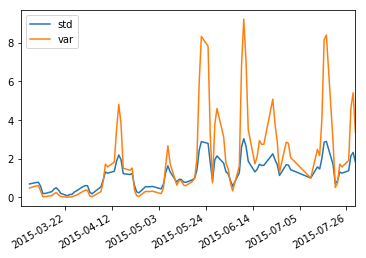

In [238]:
pd.rolling_std(stock_day['close'][:100],window=5).plot(label="std")
pd.rolling_var(stock_day['close'][:100],window=5).plot(label="var")
plt.legend()
plt.show()